In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(4252)
random_state = 4252

## Data Import

In [2]:
path = 'dataset/'

low = pd.read_csv(path+'low_v_tan_position.csv')
high = pd.read_csv(path+'high_v_tan_position.csv')

In [3]:
low.head(2)

,Unnamed: 0,SOURCE_ID,mag_abs,v_tan,l,b,g_rp
0,0,3293764686491591168,9.915977,42.387168,186.179032,-24.301958,1.112200
1,2,3293772490447823232,12.095703,31.409473,186.028342,-24.547609,1.320612


In [4]:
high.head(2)

,Unnamed: 0,SOURCE_ID,mag_abs,v_tan,l,b,g_rp
0,36,3293818223259506304,9.378773,105.648118,185.929313,-23.796143,1.109787
1,37,3293819215396280192,9.687300,119.167758,185.887620,-23.815332,1.150410


## Distribution

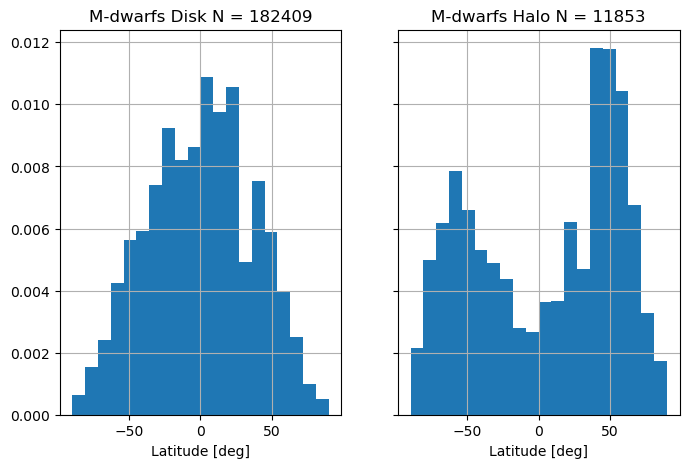

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

ax[0].hist(low['b'], density=True, bins=20)
ax[0].set_xlabel('Latitude [deg]')
#ax[0].set_ylabel('Density')

ax[1].hist(high['b'], density=True, bins=20)
ax[1].set_xlabel('Latitude [deg]')

ax[0].set_title('M-dwarfs Disk N = 182409')
ax[1].set_title('M-dwarfs Halo N = 11853')

ax[0].grid()
ax[1].grid()

## Prior

In [6]:
from scipy.stats import norm, gaussian_kde

def plot_pdf(mean, var, num = 1000, ax=None, **kwargs):
    scale=np.sqrt(var)
    x =np.linspace(norm.ppf(0.001,loc=mean,scale=scale),
                    norm.ppf(0.999,loc=mean,scale=scale), num)

    y = norm.pdf(x,loc=mean,scale=scale)

    if ax is None:
        plt.plot(x, y, **kwargs)
    else:
        ax.plot(x, y, **kwargs)

def draw_norm_samp(mean, var, n=1000, ax=None, sharex=True):
    x = norm.rvs(mean, np.sqrt(var), n, random_state=random_state)

    if ax is not None:
        kde = gaussian_kde(x)
        xx = np.linspace(-180, 180, 1000)
        
        ax.hist(x, density=True, bins= 100, alpha=0.5)
        ax.axvline(np.mean(x), c='gray', lw=3, label='Mean')
        ax.plot(xx, kde(xx), c='C0')

        ax.set_xlim(-180, 180)
        ax.set_xticks(np.arange(-180, 181, 60))
        ax.set_xticks(np.arange(-180, 181, 30), minor=True)
        ax.grid(which='minor', alpha=0.2)
        ax.grid(which='major', alpha=0.5)
        ax.tick_params(labelleft = False)
    else:
        return x

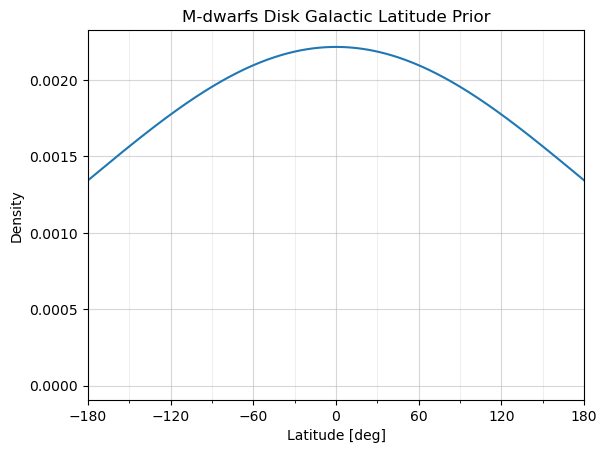

In [7]:
a= 0
b=180**2

plot_pdf(a, b)

plt.xlabel('Latitude [deg]')
plt.ylabel('Density')
plt.title('M-dwarfs Disk Galactic Latitude Prior')
plt.xlim(-180, 180)
plt.xticks(np.arange(-180, 181, 60))
plt.xticks(np.arange(-180, 181, 30), minor=True)
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.show()

### Prior check

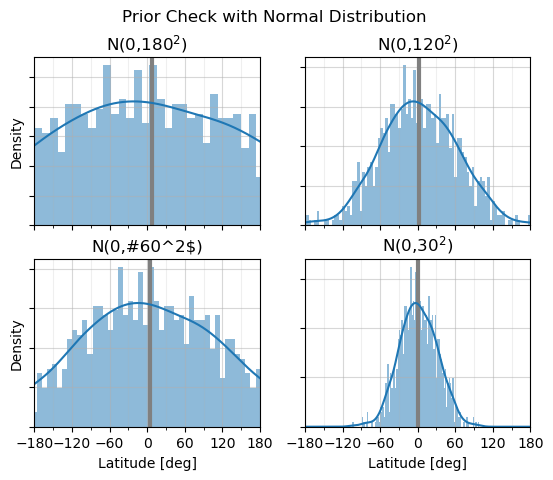

In [8]:
fig, ax = plt.subplots(2, 2)

draw_norm_samp(a, 180**2, ax=ax[0,0])
draw_norm_samp(a, 120**2, ax=ax[1,0])
draw_norm_samp(a, 60**2, ax=ax[0,1])
draw_norm_samp(a, 30**2, ax=ax[1,1])

ax[1,0].set_xlabel('Latitude [deg]')
ax[1,1].set_xlabel('Latitude [deg]')
ax[1,0].set_ylabel('Density')
ax[0,0].set_ylabel('Density')

ax[0,0].set_title('N(0,$180^2$)')
ax[0,1].set_title('N(0,$120^2$)')
ax[1,0].set_title('N(0,#60^2$)')
ax[1,1].set_title('N(0,$30^2$)')

ax[0,0].tick_params(labelleft = False, labelbottom = False)
ax[0,1].tick_params(labelleft = False, labelbottom = False)

plt.suptitle('Prior Check with Normal Distribution')
plt.show()

## Analysing Sample Data

In [9]:
nobs = len(low['b'])
samp_mean = np.mean(low['b'])
v = samp_var = np.var(low['b'])


print('Number of observations:',nobs)
print('Sample mean:',samp_mean)
print('Sample variance:',samp_var)
print('Sample sigma:', np.sqrt(samp_var))

Number of observations: 182409
Sample mean: 0.07394853063060021
Sample variance: 1336.549888767328
Sample sigma: 36.55885513480049


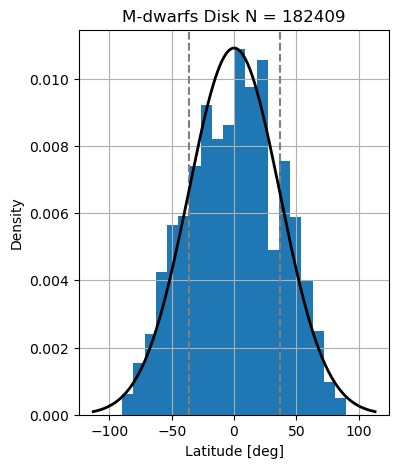

In [10]:
fig, ax = plt.subplots(1, figsize=(4, 5), sharey=True)

ax.hist(low['b'], density=True, bins=20)
ax.axvline(samp_mean-np.sqrt(samp_var), color = "gray", ls = "--", label='1 sigma')
ax.axvline(samp_mean+np.sqrt(samp_var), color = "gray", ls = "--", label='1 sigma')
plot_pdf(samp_mean, samp_var, 1000, ax=ax, color='k', lw=2, label='Posterior')

ax.set_title('M-dwarfs Disk N = 182409')
ax.set_xlabel('Latitude [deg]')
ax.set_ylabel('Density')
ax.grid()

## Posterior Estimation

In [11]:
def posterior(a, b, Print=True, ax=None):
    post_var = (v*b / (nobs*b + v)) 
    post_mean = (nobs * samp_mean / v) + a/b
    post_mean *= post_var
    ci_low_val = norm.ppf(0.025,loc=post_mean,scale=np.sqrt(post_var))
    ci_up_val = norm.ppf(0.975,loc=post_mean,scale=np.sqrt(post_var))

    if ax is not None:

        plot_pdf(post_mean, post_var, ax=ax)
        ax.axvline(post_mean, color = "gray", lw=3, label='Mean')
        ax.axvline(ci_low_val, color = "b", ls = "--", label = '95% Interval')
        ax.axvline(ci_up_val, color = "b", ls = "--")
        ax.grid()

    if Print:
        print('Posterior Mean:',post_mean)
        print('Posterior Variance:',post_var)
        print('Posterior Sigma:',np.sqrt(post_var))
        print('95 % interval: ', ci_up_val-ci_low_val)
        return post_mean, post_var, ci_low_val, ci_up_val

In [12]:
post_mean, post_var, ci_low_val, ci_up_val = posterior(a, b)

Posterior Mean: 0.0739485139072474
Posterior Variance: 0.007327212947324483
Posterior Sigma: 0.08559914104314648
95 % interval:  0.33554246710426294


Text(0.5, 1.0, 'M-dwarfs Disk Galactic Latitude Posterior')

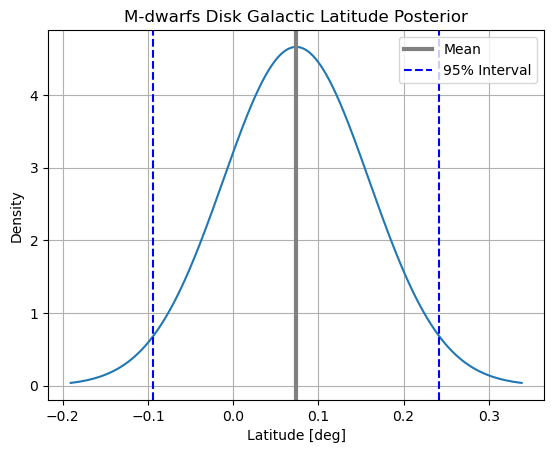

In [13]:
fig, ax = plt.subplots()

posterior(a, b, Print=False, ax=ax)

plt.legend()
plt.xlabel('Latitude [deg]')
plt.ylabel('Density')
plt.title('M-dwarfs Disk Galactic Latitude Posterior')

## Posterior Predictive Test

#### Generate $\theta_{j}$ from Posterior Distribution

In [14]:
post_samp =  draw_norm_samp(post_mean, post_var, 1)

Generate $X_{j}$ from posterior sample mean using the know variance v

Text(0.5, 1.0, 'Posterior Predictive Distribution')

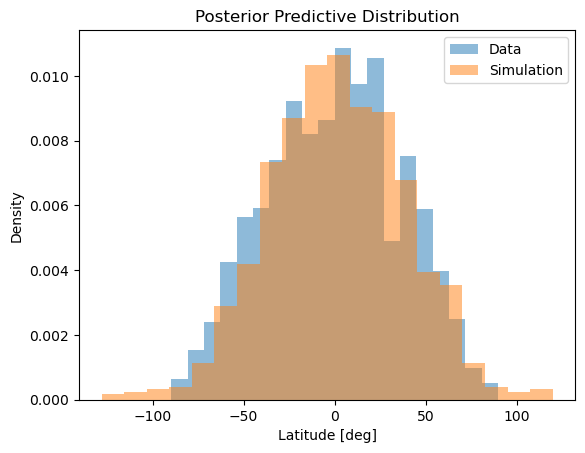

In [15]:
post_pred = draw_norm_samp(post_samp, v, 1000)

fig, ax = plt.subplots(1)

ax.hist(low['b'], density=True, bins=20, alpha=0.5, label='Data')
ax.hist(post_pred, density=True, bins=20, alpha=0.5, label='Simulation')
ax.set_xlabel('Latitude [deg]')
plt.ylabel('Density')

ax.grid()
ax.grid()
plt.legend()
plt.title('Posterior Predictive Distribution')



## Sensititvity Analysis

b = 180^2
Posterior Mean: 0.0739485139072474
Posterior Variance: 0.007327212947324483
Posterior Sigma: 0.08559914104314648
95 % interval:  0.33554246710426294

b = 120^2
Posterior Mean: 0.07394849300306701
Posterior Variance: 0.007327210876026859
Posterior Sigma: 0.08559912894432314
95 % interval:  0.33554241967774695

b = 90^2
Posterior Mean: 0.07394846373723435
Posterior Variance: 0.007327207976212154
Posterior Sigma: 0.0855991120059791
95 % interval:  0.3355423532806584

b = 60^2
Posterior Mean: 0.07394792859466424
Posterior Variance: 0.007327154951433682
Posterior Sigma: 0.08559880227803238
95 % interval:  0.33554113916941725


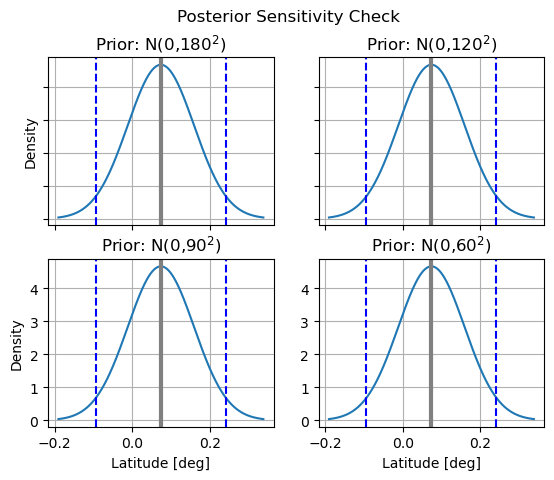

In [16]:
fig, ax = plt.subplots(2, 2)

print('b = 180^2')
posterior(0, 180**2, ax=ax[0,0])
print()
print('b = 120^2')
posterior(0, 120**2, ax=ax[0,1])
print()
print('b = 90^2')
posterior(0, 90**2, ax=ax[1,0])
print()
print('b = 60^2')
posterior(0, 30**2, ax=ax[1,1])

ax[1,0].set_xlabel('Latitude [deg]')
ax[1,1].set_xlabel('Latitude [deg]')
ax[1,0].set_ylabel('Density')
ax[0,0].set_ylabel('Density')


ax[0,0].set_title('Prior: N(0,$180^2$)')
ax[0,1].set_title('Prior: N(0,$120^2$)')
ax[1,0].set_title('Prior: N(0,$90^2$)')
ax[1,1].set_title('Prior: N(0,$60^2$)')

ax[0,0].tick_params(labelleft = False, labelbottom = False)
ax[0,1].tick_params(labelleft = False, labelbottom = False)

plt.suptitle('Posterior Sensitivity Check')
plt.show()